Visualizing Thematic Analysis Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('../data/thematic_reviews/thematic_reviews.csv')

# Display first few rows
df.head()

,review,rating,date,bank,source_app,sentiment_label,sentiment_score,theme
0,The CBE app has been highly unreliable in rece...,2,NaN,CBE,CBE,NEGATIVE,0.999739,"Other, Security & Login, Usability, Customer S..."
1,"this new update(Mar 19,2025) is great in fixin...",4,NaN,CBE,CBE,NEGATIVE,0.996838,"Customer Support, Performance, Security & Logi..."
2,Good job to the CBE team on this mobile app! I...,5,NaN,CBE,CBE,POSITIVE,0.999819,"Customer Support, Performance, Security & Logi..."
3,this app has developed in a very good ways but...,5,NaN,CBE,CBE,NEGATIVE,0.998314,"Customer Support, Performance, Security & Logi..."
4,as if the update of march 19 i can't take a sc...,2,NaN,CBE,CBE,NEGATIVE,0.999533,"Customer Support, Performance, Security & Logi..."


Visualization 1: Theme Frequency Across Banks

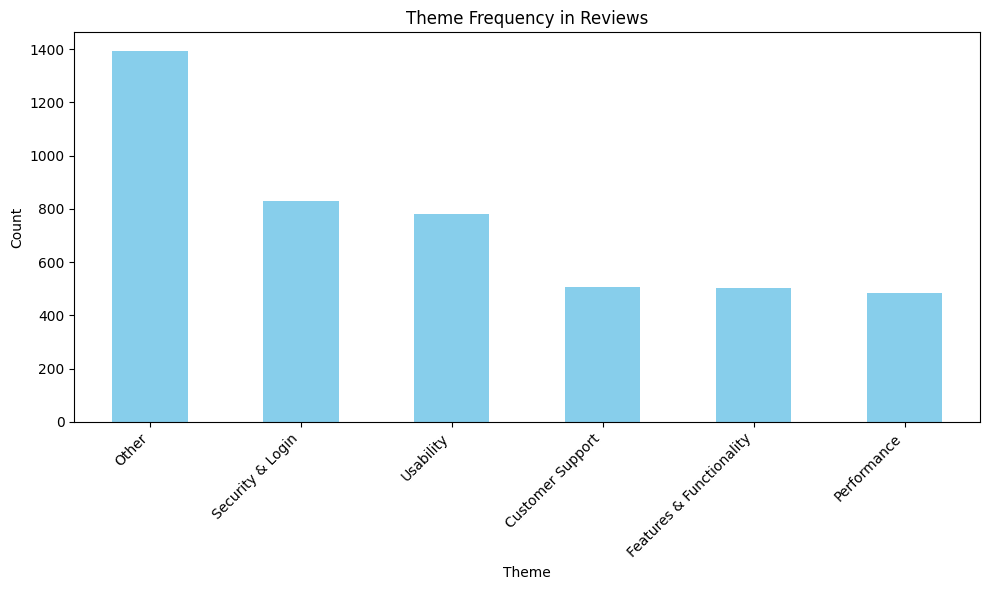

In [2]:
theme_counts = df['theme'].str.split(', ').explode().value_counts()

plt.figure(figsize=(10,6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Theme Frequency in Reviews')
plt.xlabel('Theme')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Visualization 2: Themes per Bank (Stacked Bar Chart)

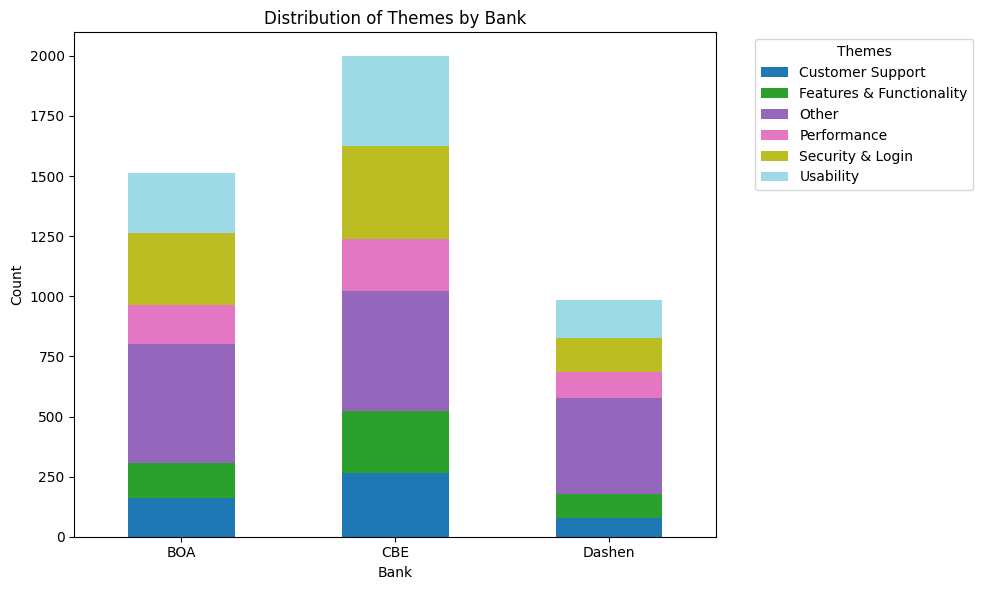

In [4]:
# Split the 'theme' column and explode it before grouping
df['theme_split'] = df['theme'].str.split(', ')
theme_by_bank = df.explode('theme_split').groupby(['bank', 'theme_split']).size().unstack(fill_value=0)

theme_by_bank.plot(kind='bar', stacked=True, figsize=(10,6), cmap='tab20')
plt.title('Distribution of Themes by Bank')
plt.xlabel('Bank')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Visualization 3: Word Cloud of Themes

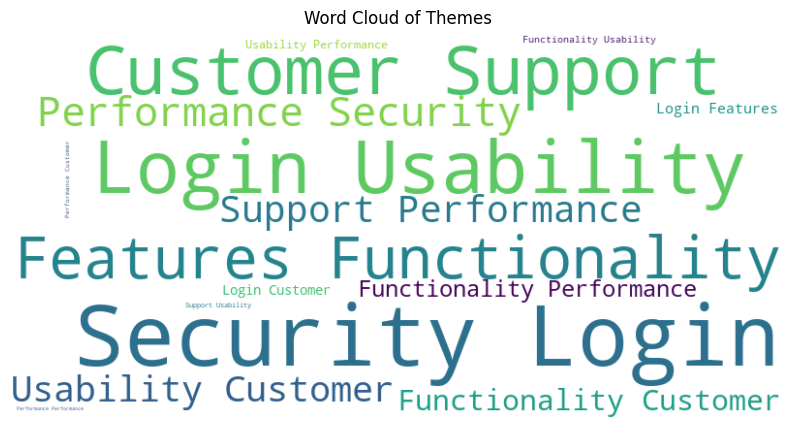

In [5]:
text = ' '.join(df['theme'].str.replace(', ', ' '))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Themes")
plt.show()

Visualization 4: Top Themes per Bank

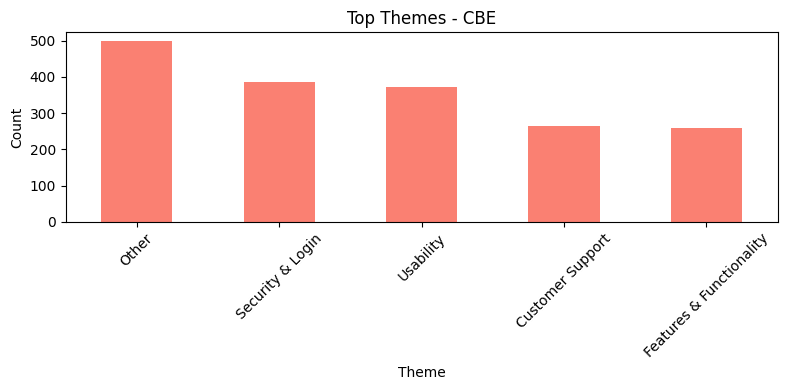

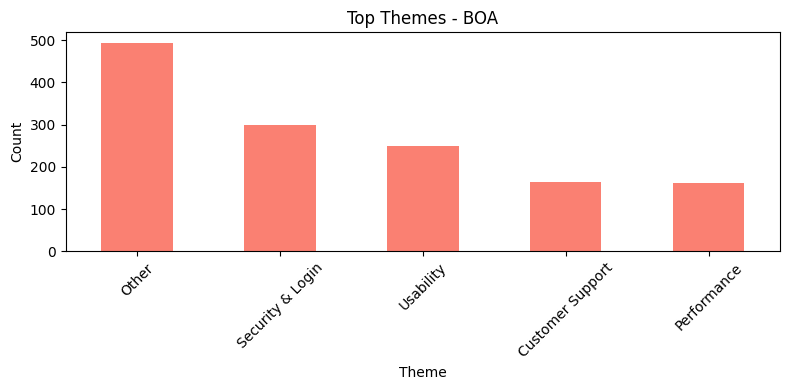

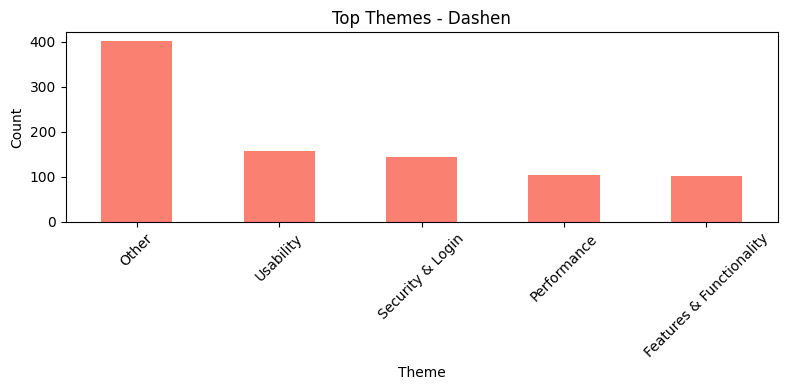

In [6]:
for bank in df['bank'].unique():
    bank_df = df[df['bank'] == bank]
    theme_counts = bank_df['theme'].str.split(', ').explode().value_counts().head(5)
    
    plt.figure(figsize=(8,4))
    theme_counts.plot(kind='bar', color='salmon')
    plt.title(f'Top Themes - {bank}')
    plt.xlabel('Theme')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()